## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

> Epoch 100<br>
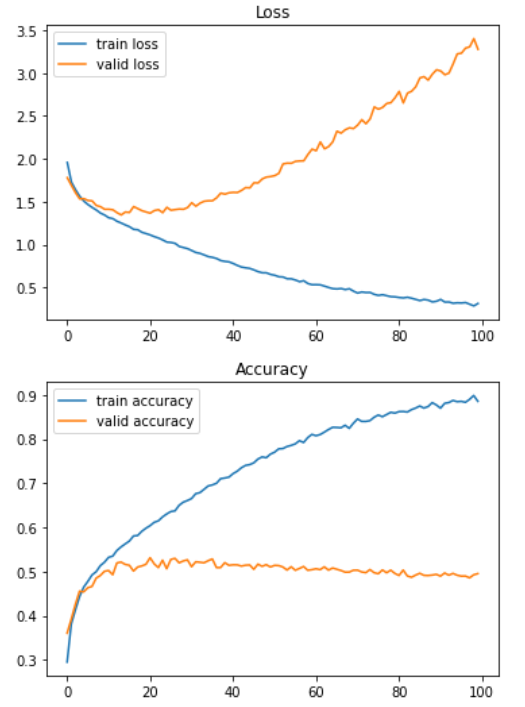

> Epoch 500 <br>
> 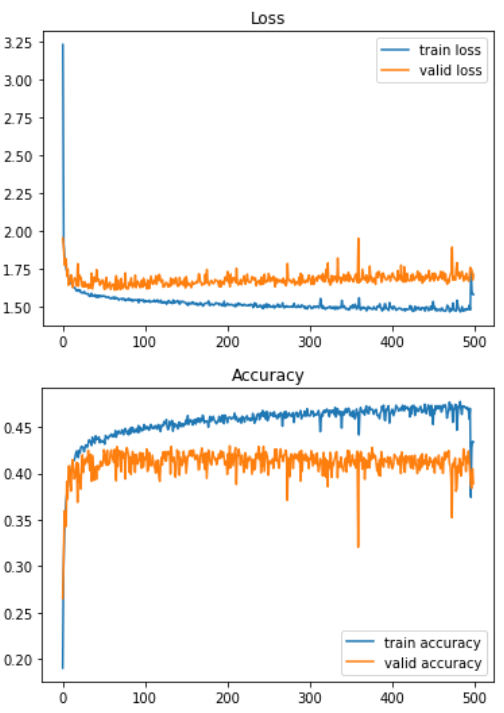

> optimizer: SGD<br>
> 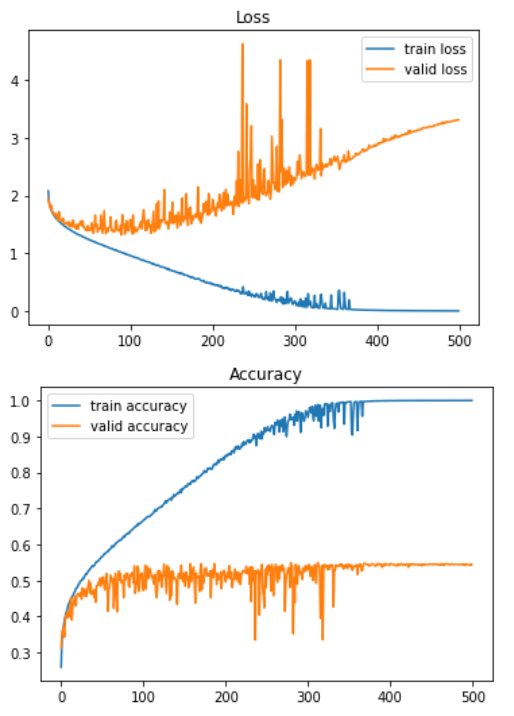

In [1]:
import keras

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
x_train.shape

(50000, 3072)

In [5]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(x_train.shape[-1])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=input_layer, outputs=out)

    return model


In [6]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 2s 6ms/step - loss: 6.8909 - accuracy: 0.1410 - val_loss: 1.9545 - val_accuracy: 0.2652
Epoch 2/500
196/196 [==============================] - 1s 4ms/step - loss: 1.9366 - accuracy: 0.2801 - val_loss: 1.8898 - val_accuracy: 0.3013
Epoch 3/500
196/196 [==============================] - 1s 4ms/step - loss: 1.8539 - accuracy: 0.3235 - val_loss: 1.7761 - val_accuracy: 0.3595
Epoch 4/500
196/196 [==============================] - 1s 4ms/step - loss: 1.7822 - accuracy: 0.3534 - val_loss: 1.7971 - val_accuracy: 0.3467
Epoch 5/500
196/196 [==============================] - 1s 4ms/step - loss: 1.7689 - accuracy: 0.3586 - val_loss: 1.8162 - val_accuracy: 0.3427
Epoch 6/500
196/196 [==============================] - 1s 4ms/step - loss: 1.7500 - accuracy: 0.3683 - val_loss: 1.6998 - val_accuracy: 0.3910
Epoch 7/500
196/196 [==============================] - 1s 4ms/step - loss: 1.7076 - accuracy: 0.3844 - val_loss: 1.7488 - val_accuracy: 0.3724

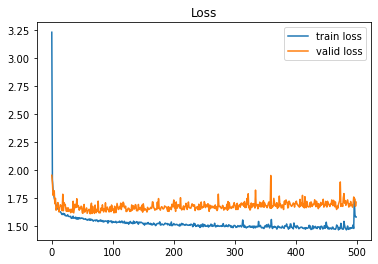

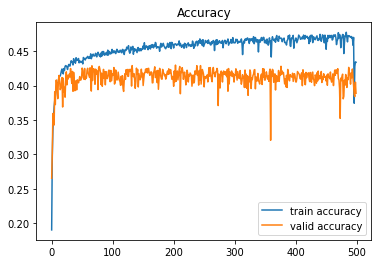

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 更換Optimizer為 SGD (Epoch 100)

In [9]:
"""
Compile 模型
"""
model2 = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model2.summary()

optimizer = keras.optimizers.SGD(learning_rate=0.01)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [10]:
"""
設定要訓練的 Epoch 數
"""
model2.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 1s 5ms/step - loss: 2.1705 - accuracy: 0.2144 - val_loss: 1.9510 - val_accuracy: 0.3120
Epoch 2/500
196/196 [==============================] - 1s 4ms/step - loss: 1.9106 - accuracy: 0.3299 - val_loss: 1.8658 - val_accuracy: 0.3474
Epoch 3/500
196/196 [==============================] - 1s 4ms/step - loss: 1.8373 - accuracy: 0.3489 - val_loss: 1.8046 - val_accuracy: 0.3656
Epoch 4/500
196/196 [==============================] - 1s 4ms/step - loss: 1.7891 - accuracy: 0.3667 - val_loss: 1.7674 - val_accuracy: 0.3712
Epoch 5/500
196/196 [==============================] - 1s 4ms/step - loss: 1.7488 - accuracy: 0.3823 - val_loss: 1.8311 - val_accuracy: 0.3422
Epoch 6/500
196/196 [==============================] - 1s 4ms/step - loss: 1.7164 - accuracy: 0.3974 - val_loss: 1.7077 - val_accuracy: 0.3880
Epoch 7/500
196/196 [==============================] - 1s 4ms/step - loss: 1.6806 - accuracy: 0.4081 - val_loss: 1.7036 - val_accuracy: 0.4040

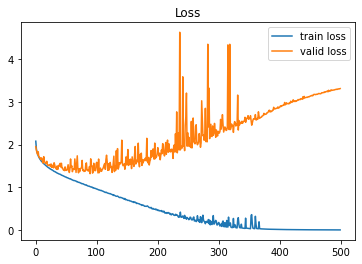

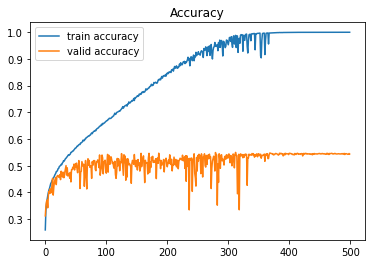

In [11]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model2.history.history["loss"]
valid_loss = model2.history.history["val_loss"]

train_acc = model2.history.history["accuracy"]
valid_acc = model2.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()